# Student Performance Indicator

1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity,   Parental level of education, Lunch and Test preparation course.

2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
  The data consists of 8 column and 1000 rows.
2.1 Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
print("The shape of dataset is {}".format(df.shape))

The shape of dataset is (1000, 8)


2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

<b> 3.1 Check Missing values </b>

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in our dataset

<b> 3.2 Check Duplicates </b>

In [13]:
df.duplicated().sum()

0

There are no duplicate

<b> 3.3 Check data types </b>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<b> 3.4 Checking the number of unique values of each column </b>

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

 <b> 3.5 Check statistics of data set </b>

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<b> Insights </b>
- Looking at above statistics it can be seen that mean for all the subject is around 66-68 which signifies at first instance that most of students has performed well in the exam. However, this would required further analysis because it could be result of some skewness in the data.
- The std looks high for all the subject, seems like the numbers are spread out wide.


<b> 3.6 Exploring Data </b>

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- Printing different categories for categorical columns

In [34]:
for i in df.columns:
    if df[i].dtypes == 'O':
        print("There are following different categories in this {} variable: {}\n".format(i, df[i].unique()))
    

There are following different categories in this gender variable: ['female' 'male']

There are following different categories in this race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']

There are following different categories in this parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

There are following different categories in this lunch variable: ['standard' 'free/reduced']

There are following different categories in this test_preparation_course variable: ['none' 'completed']



- Separating out numerical and categorical columns

In [44]:
numeric_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']

print("There are following different numeric columns we have: {}\n".format(numeric_feature))
print("There are following different categorical columns we have: {}\n".format(categorical_feature))


There are following different numeric columns we have: ['math_score', 'reading_score', 'writing_score']

There are following different categorical columns we have: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']



<b> 3.7 Adding columns for "Total Score" and "Average" </b>

In [4]:
df['total score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()


print(f'Number of students that have full marks in math, writing, and reading respectivly {math_full}, {writing_full}, and {reading_full}')

Number of students that have full marks in math, writing, and reading respectivly 7, 14, and 17


In [52]:
math_full = df[df['math_score'] <= 20]['average'].count()
writing_full = df[df['writing_score'] <= 20]['average'].count()
reading_full = df[df['reading_score'] <= 20]['average'].count()


print(f'Number of students that have less than 20 marks in math, writing, and reading respectivly {math_full}, {writing_full}, and {reading_full}')

Number of students that have less than 20 marks in math, writing, and reading respectivly 4, 3, and 1


- The above numbers somewhat proves the point that we made earlier; there are more students having high marks which might be causing the mean skewed to above 60.

<b> 4. Exploring Data ( Visualization ) </b>


4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

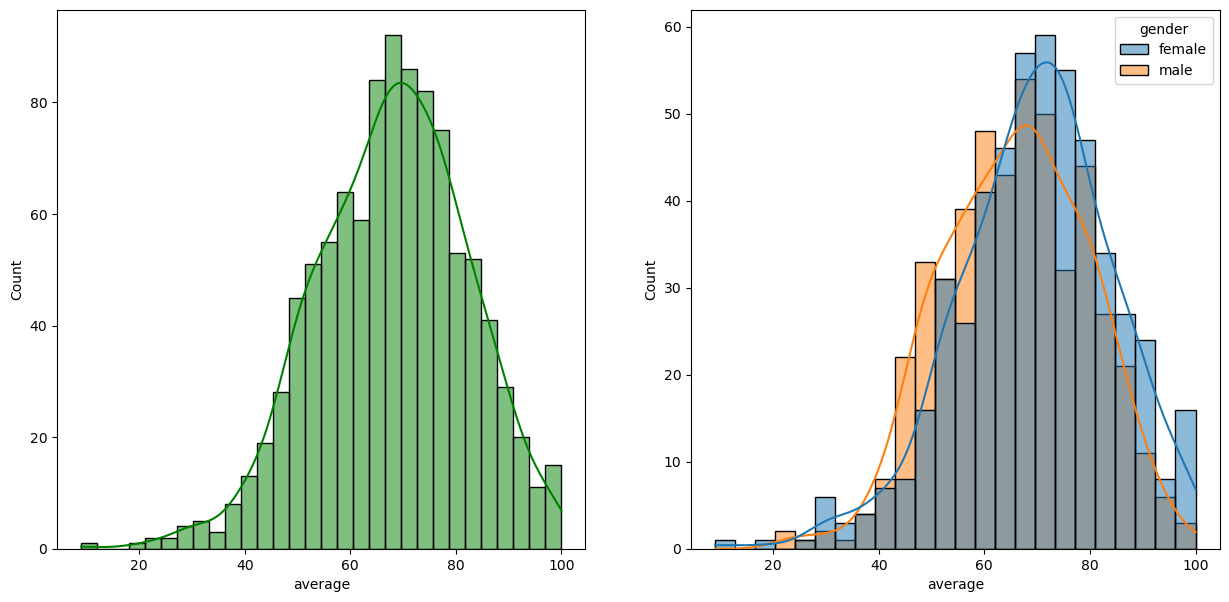

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

- Female students seems to be performing well compared to male students

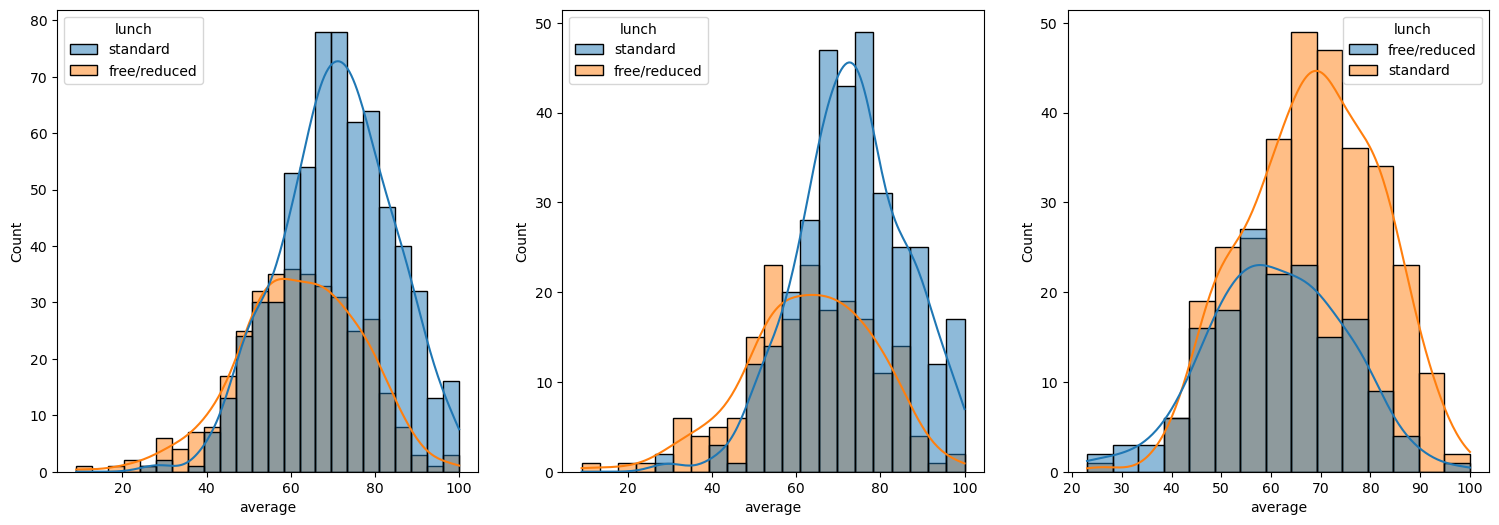

In [61]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

- Those students who are having standard meals tend to perform well in exam's, and it looks consistent between both the genders.

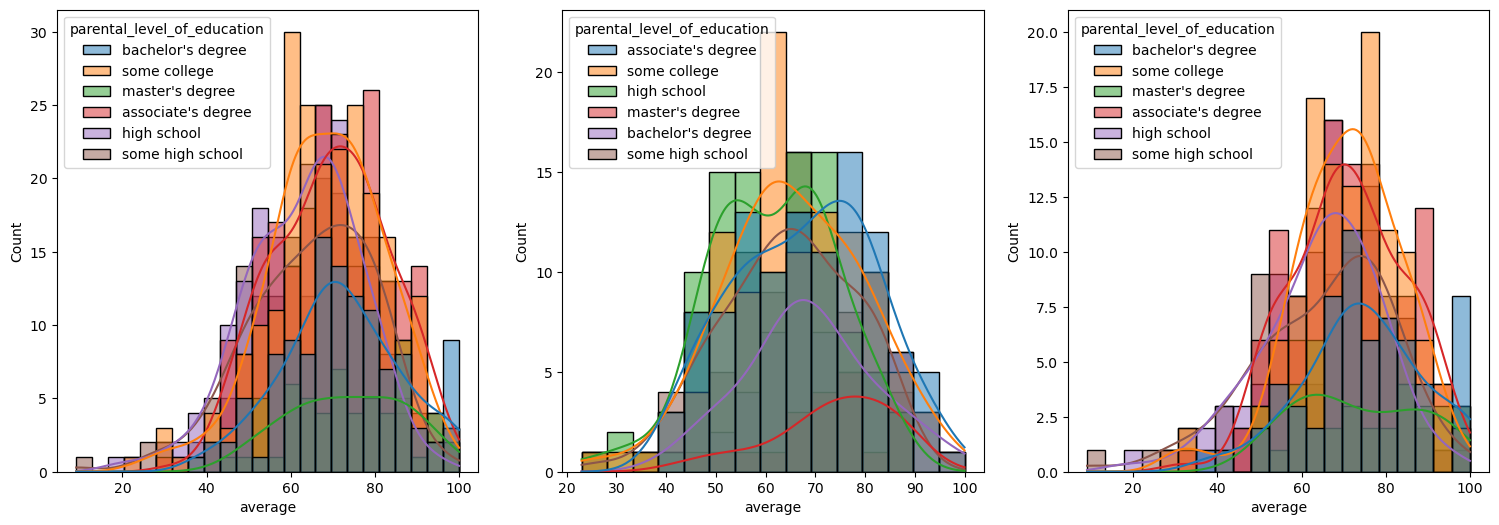

In [63]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

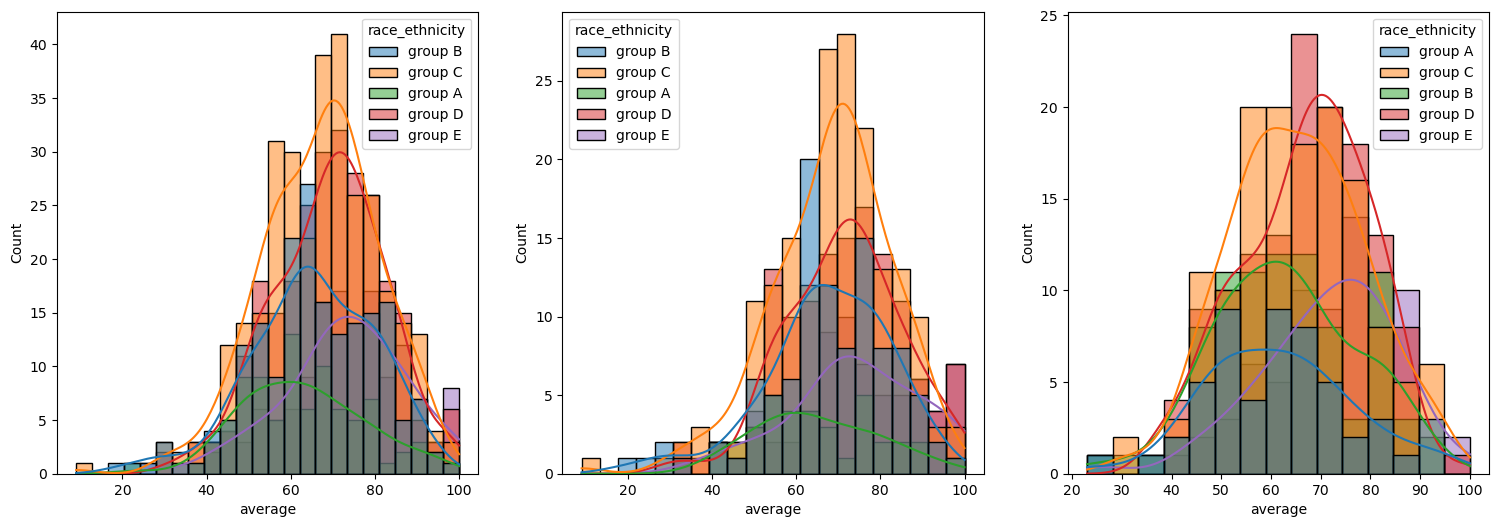

In [75]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- Students that are belong to category A and B tend to perform bad, and it's consistent between the genders.
- Male students who belong to category C might have a chance to outperform.

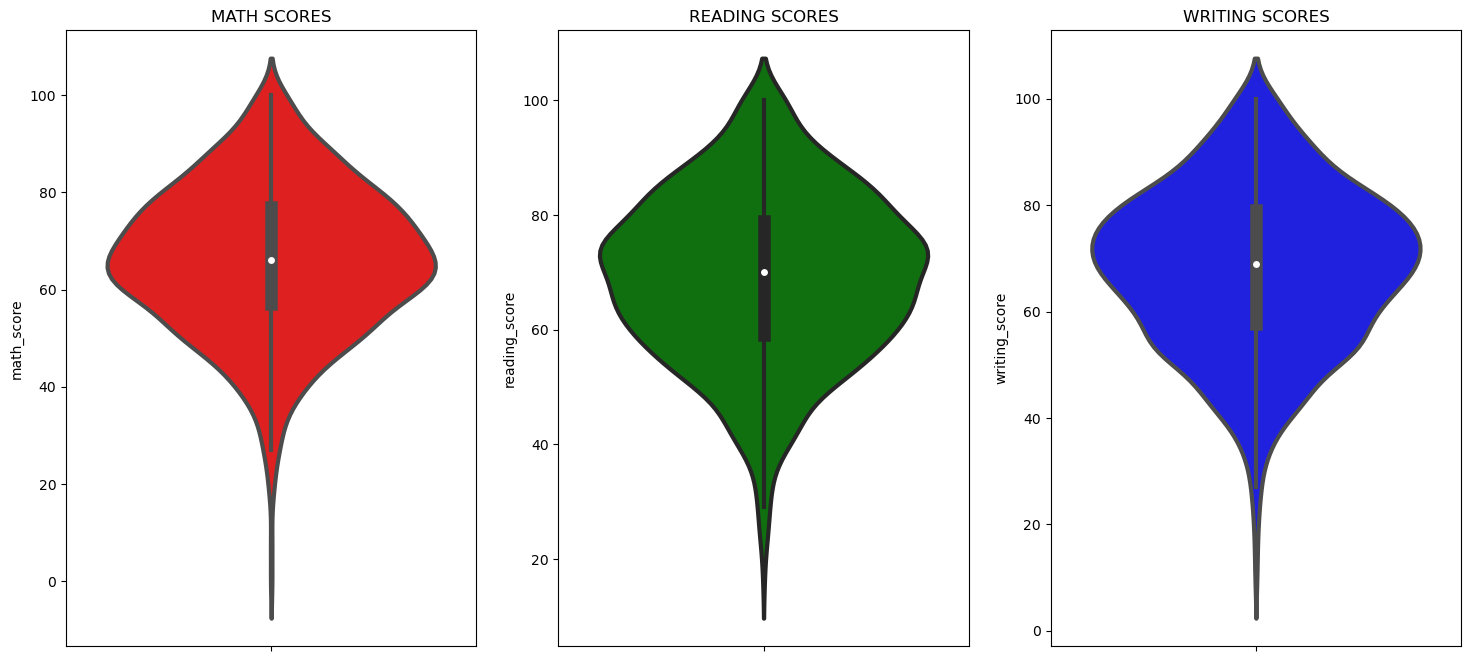

In [73]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- Above plots clearly shows most of the students performs between 60-80 in Math, while around 55-80 in the remaining subjects.

<b> Multivariate analysis using pieplot

In [90]:

plt.rcParams['figure.figsize'] = (200, 50)
plt.rcParams['font.size'] =80


plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 50)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 50)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 50)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 50)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 50)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

<b> Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

<function matplotlib.pyplot.show(close=None, block=None)>

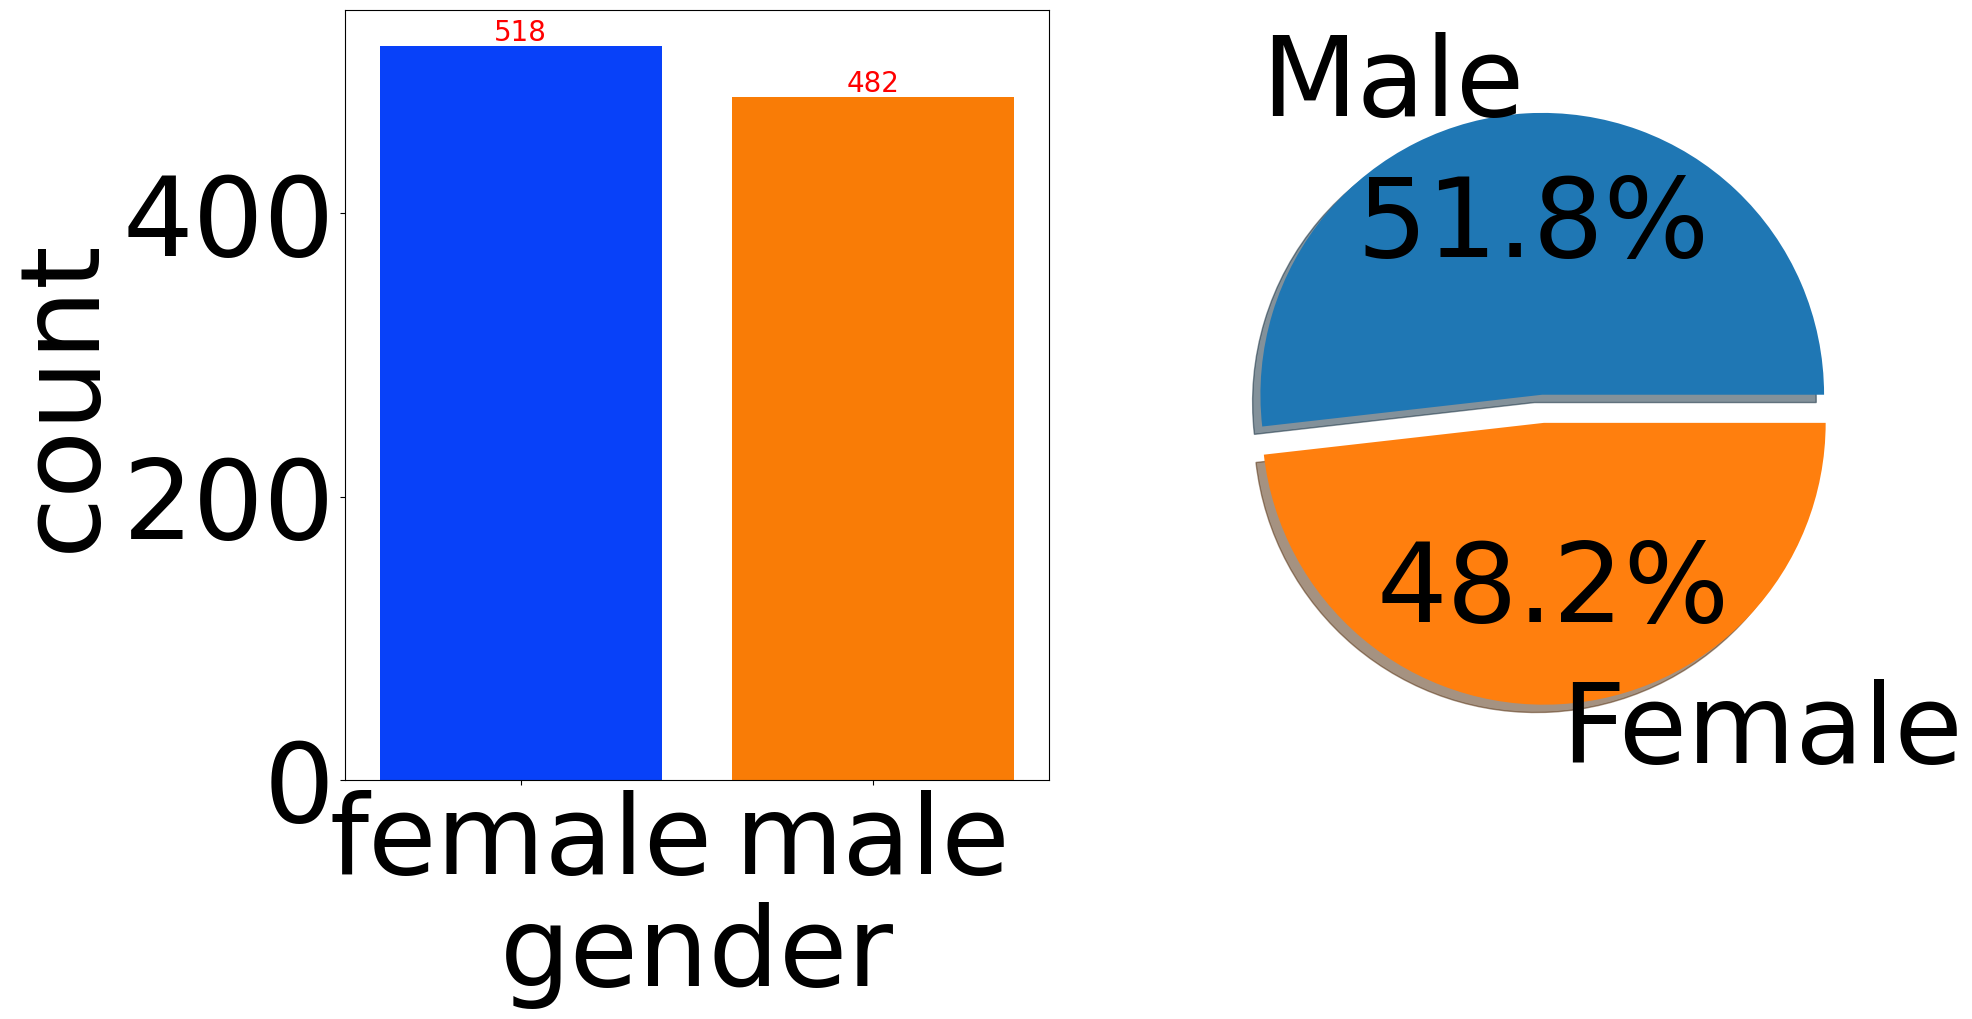

In [101]:
f, ax = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x=df['gender'], data = df , palette=  'bright', ax=ax[0], saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'red' , size= 20)
    
plt.pie(x= df['gender'].value_counts() , labels= ['Male', 'Female'], explode = [0,0.1], autopct='%1.1f%%',shadow=True )
plt.show

- Gender looks balance in our dataset.

<b> BIVARIATE ANALYSIS

In [102]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


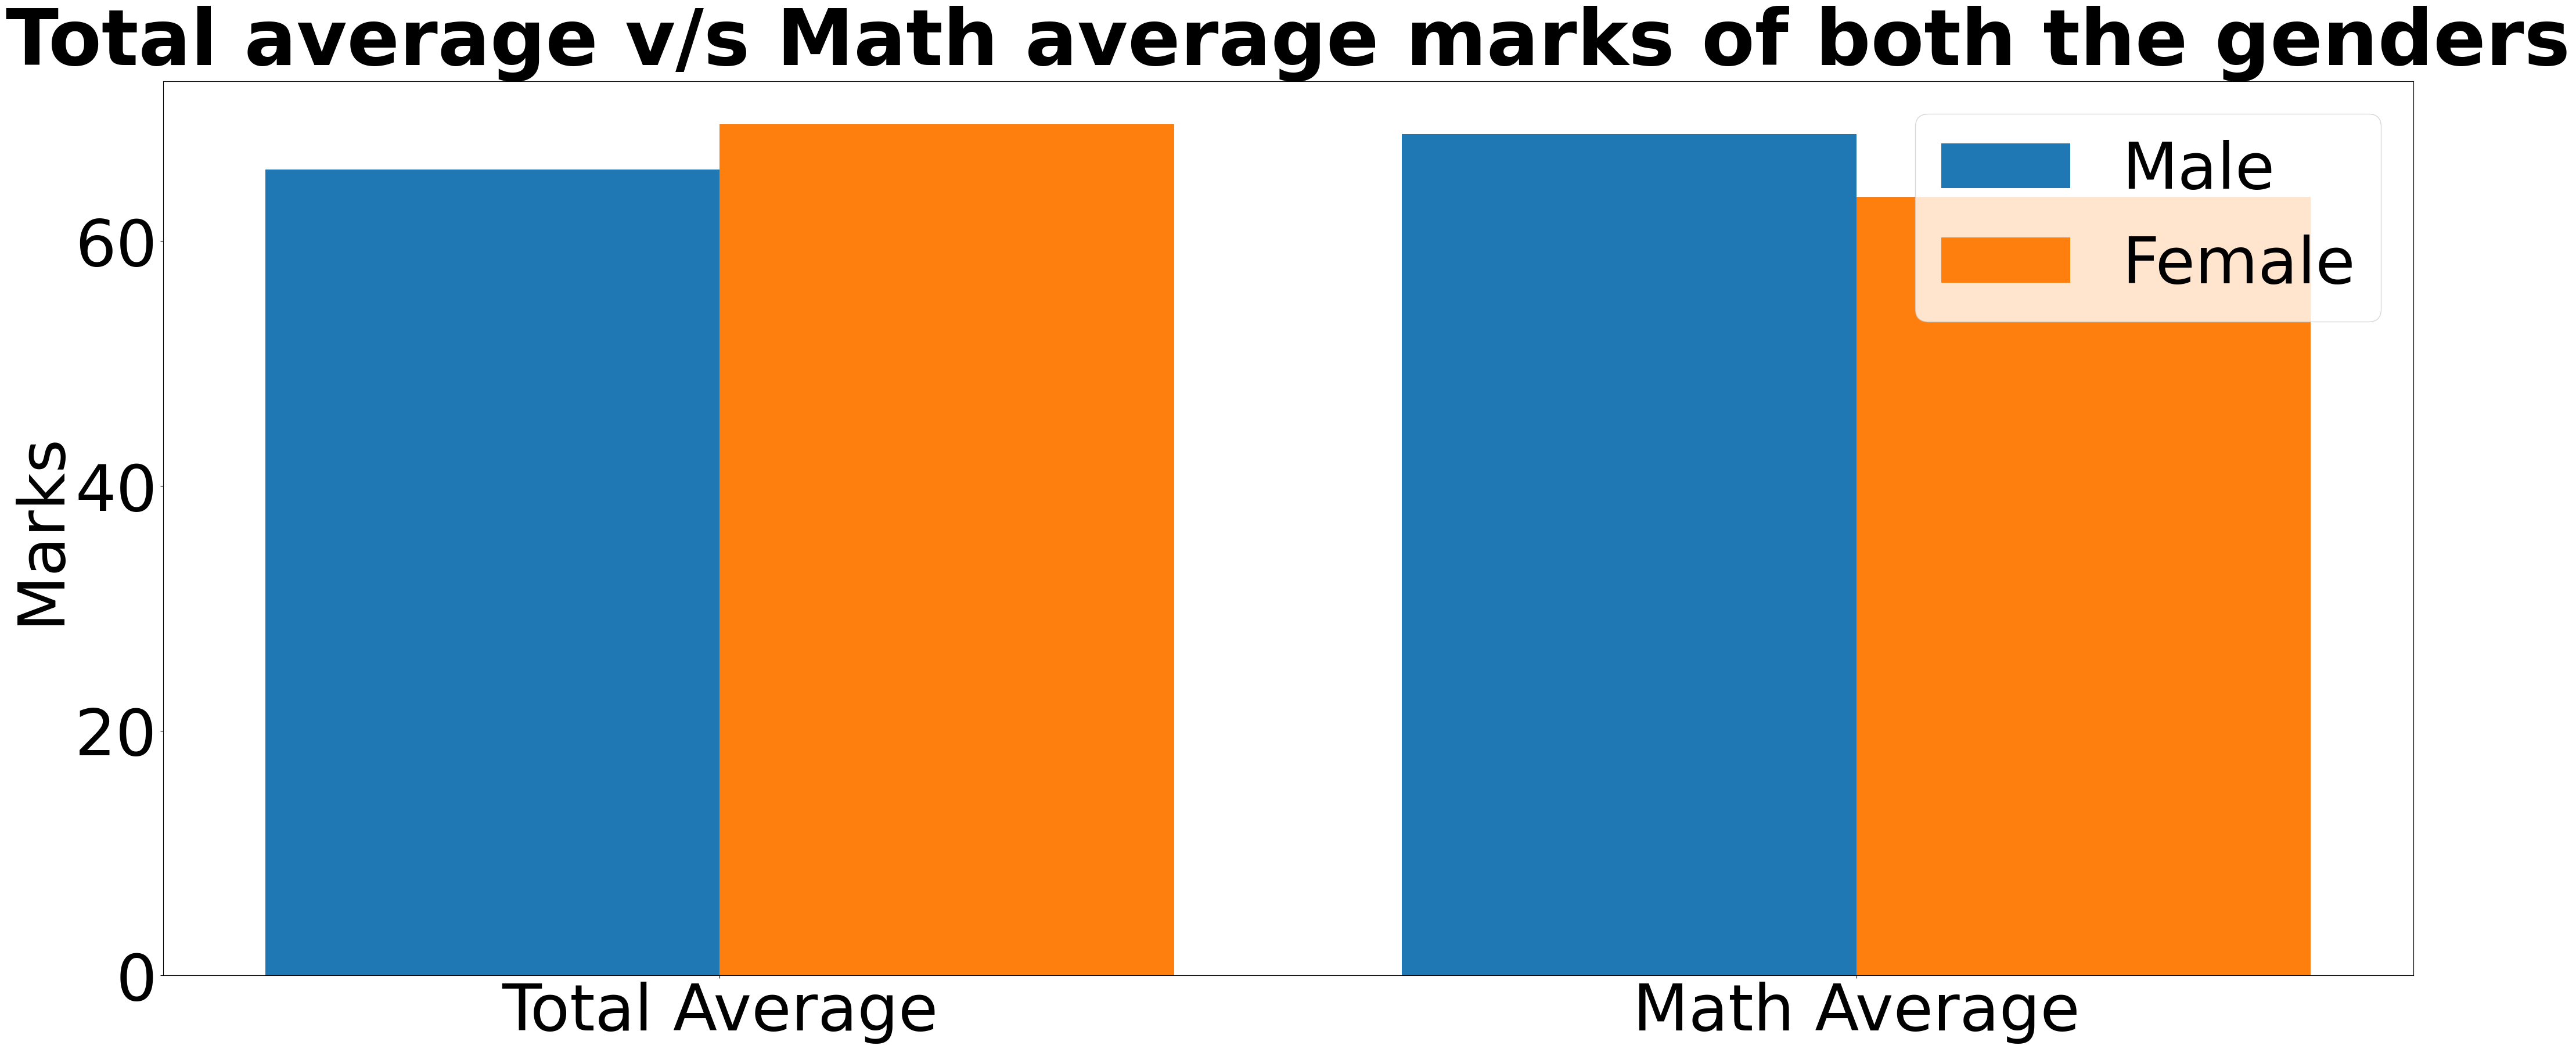

In [119]:
plt.figure(figsize=(50, 20))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

<b> 4.4.2 RACE/EHNICITY COLUMN

UNIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

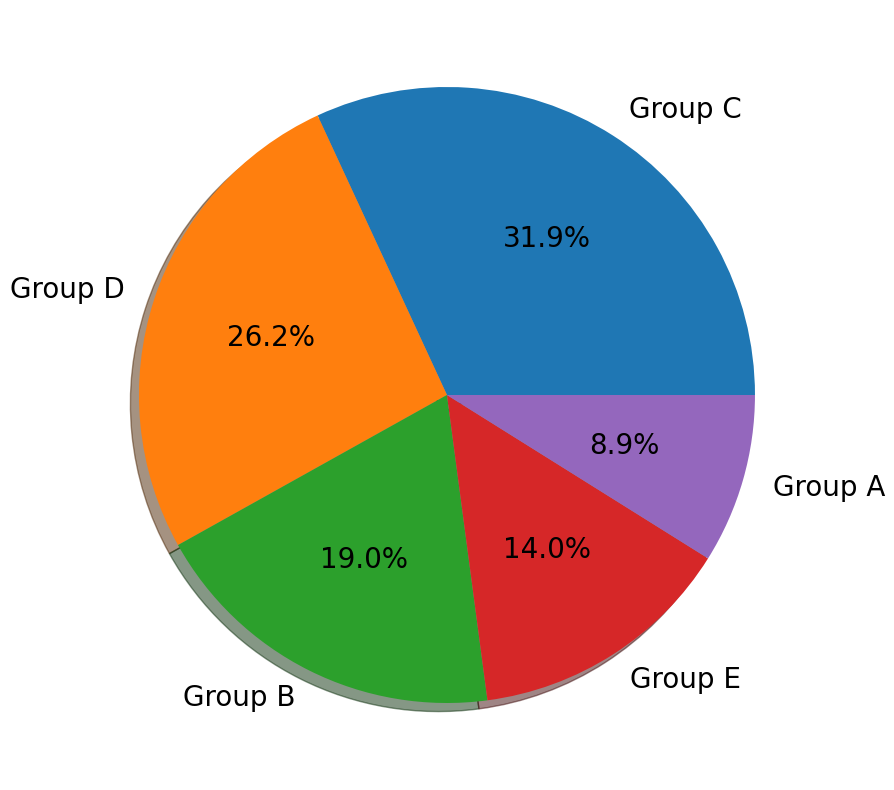

In [125]:
f, ax = plt.subplots(1,1, figsize=(20,10))
plt.rcParams['font.size'] =20
# sns.countplot(x=df['race_ethnicity'], data = df , palette=  'bright', ax=ax[0], saturation = 0.95)

# for container in ax[0].containers:
#     ax[0].bar_label(container, color = 'red' , size= 20)
    
plt.pie(x= df['race_ethnicity'].value_counts() , labels= ['Group C', 'Group D','Group B','Group E','Group A'], autopct='%1.1f%%',shadow=True )
plt.show

- Most of the students belongs to group C and D.

BIVARIATE ANALYSIS 

In [136]:
race_group = df.groupby('race_ethnicity').mean()

race_group

,math_score,reading_score,writing_score,total score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


[Text(0, 0, 'group A'),
 Text(1, 0, 'group B'),
 Text(2, 0, 'group C'),
 Text(3, 0, 'group D'),
 Text(4, 0, 'group E')]

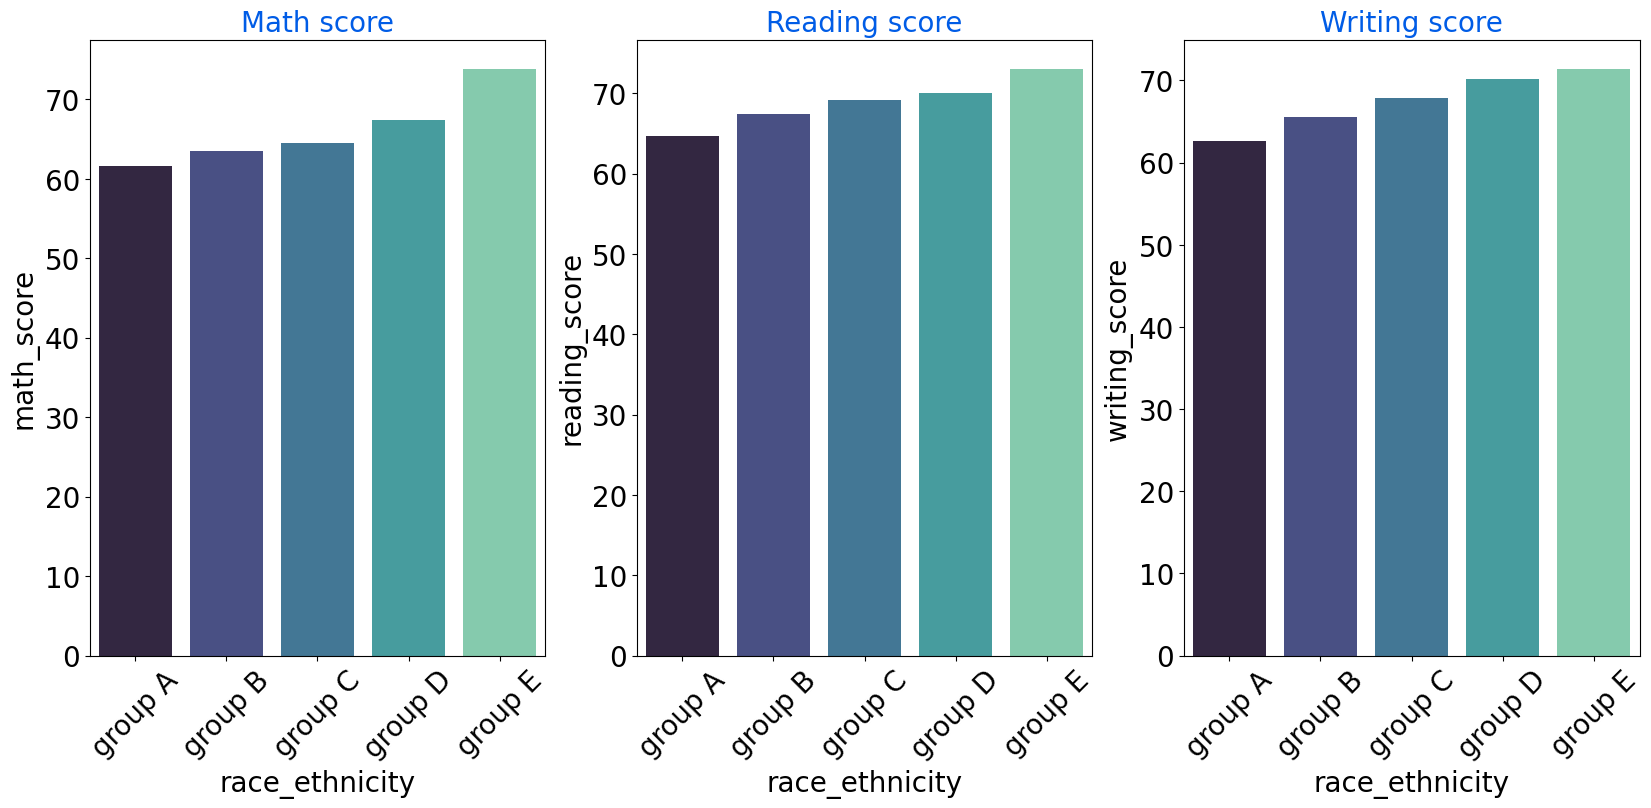

In [148]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=race_group['math_score'].index,y=race_group['math_score'],palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
ax[0].set_xticklabels(race_group['math_score'].index, rotation=45)

sns.barplot(x=race_group['reading_score'].index,y=race_group['reading_score'],palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
ax[1].set_xticklabels(race_group['reading_score'].index, rotation=45)

sns.barplot(x=race_group['writing_score'].index,y=race_group['writing_score'],palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
ax[2].set_xticklabels(race_group['writing_score'].index, rotation=45)

<b> 4.4.3 Lunch COLUMN

UNIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

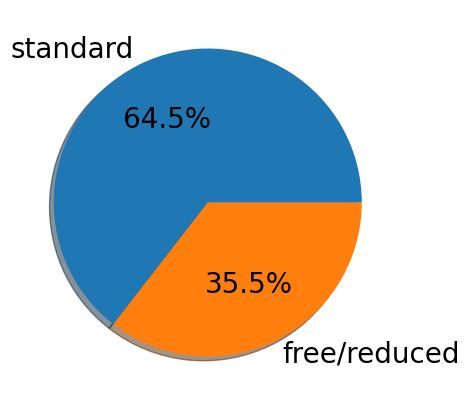

In [157]:
f, ax = plt.subplots(1,1, figsize=(5,5))
plt.rcParams['font.size'] =20
# sns.countplot(x=df['race_ethnicity'], data = df , palette=  'bright', ax=ax[0], saturation = 0.95)

# for container in ax[0].containers:
#     ax[0].bar_label(container, color = 'red' , size= 20)
    
plt.pie(x= df['lunch'].value_counts() , labels= df['lunch'].unique(), autopct='%1.1f%%',shadow=True )
plt.show

- Around 64.5% students take standard lunch.

BIVARIATE ANALYSIS

In [159]:
lunch_group = df.groupby('lunch').mean()

lunch_group

,math_score,reading_score,writing_score,total score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


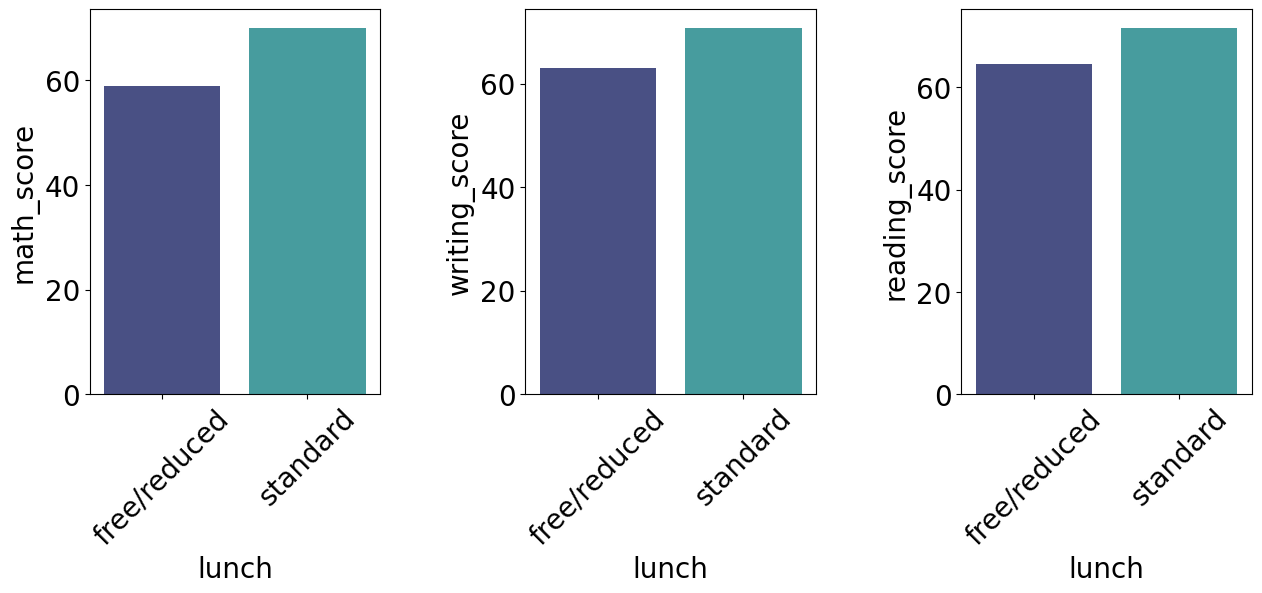

In [173]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.barplot(x=lunch_group['math_score'].index, y=lunch_group['math_score'],palette = 'mako',ax=ax[0])
ax[0].set_xticklabels(lunch_group['math_score'].index, rotation=45)

sns.barplot(x=lunch_group['writing_score'].index, y=lunch_group['writing_score'],palette = 'mako',ax=ax[1])
ax[1].set_xticklabels(lunch_group['writing_score'].index, rotation=45)

sns.barplot(x=lunch_group['math_score'].index, y=lunch_group['reading_score'],palette = 'mako',ax=ax[2])
ax[2].set_xticklabels(lunch_group['reading_score'].index, rotation=45)

plt.subplots_adjust(wspace=0.5)

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [6]:
df.to_csv("data/student.csv")